In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [30]:
df_train_x = pd.read_csv("data/splitted/Fraud_Detection_train_features.csv")
df_train_y = pd.read_csv("data/splitted/Fraud_Detection_train_target.csv")
df_val_x = pd.read_csv("data/splitted/Fraud_Detection_validation_features.csv")
df_val_y = pd.read_csv("data/splitted/Fraud_Detection_validation_target.csv")
df_test_x = pd.read_csv("data/splitted/Fraud_Detection_test_features.csv")
df_test_y = pd.read_csv("data/splitted/Fraud_Detection_test_target.csv")

#shape가 일치하는지 확인
print(df_train_x.shape)
print(df_train_y.shape)
print(df_val_x.shape)
print(df_val_y.shape)
print(df_test_x.shape)
print(df_test_y.shape)

(28014, 18)
(28014, 1)
(9338, 18)
(9338, 1)
(9339, 18)
(9339, 1)


In [31]:
df_train_x.head(8)

,TRANS_YEAR,IS_COVID_YEAR,TRANS_MONTH,TRANS_DAY,TRANS_DAY_SIMPLIFIED,TRANS_HOUR,TRANS_HOUR_SIMPLIFIED,CATEGORY,AMT,GENDER,CITY,CITY_POP,STATE,JOB,AGE,CC_NUM,log_AMT,BC_CITY_POP
0,2019,False,1,10,0,23,3,1,344.01,False,Fulton,355,45,Financial adviser,68,3513618443244549,5.840671,4.329507
1,2019,False,12,30,2,7,1,1,92.80,False,Avoca,2036,8,Engineering geologist,52,4198470814557,4.530447,5.164343
2,2020,True,9,28,2,14,2,9,6.02,False,Mulberry Grove,1810,43,Race relations officer,48,371226440126102,1.795087,5.112989
3,2019,False,9,1,0,23,3,6,1002.17,True,Sacramento,757530,11,Magazine features editor,44,4890424426862856940,6.909923,7.052526
4,2019,False,6,5,0,22,3,8,107.33,False,Lawn,213,5,Special educational needs teacher,51,4169759661243568,4.675908,4.053561
5,2020,True,10,12,1,17,2,11,7.64,True,Arcadia,680,19,"Designer, jewellery",56,3547560454237873,2.033398,4.658996
6,2019,False,3,8,0,12,1,6,7.48,False,Hinesburg,4542,39,Claims inspector/assessor,25,6534628260579800,2.012233,5.497430
7,2020,True,12,22,2,10,1,0,9.71,False,Grandview,5875,17,"Radiographer, therapeutic",31,4908846471916297,2.273156,5.598198


In [32]:
df_train_y.head(8)

,IS_FRAUD
0,True
1,False
2,False
3,True
4,True
5,False
6,False
7,False


train 데이터셋을 이리저리 뜯어보고 만져보고 시각화하며 train 데이터셋의 인사이트, 패턴을 발견한다.

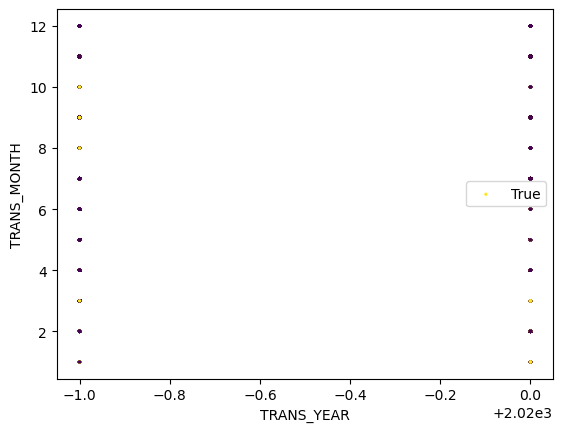

In [33]:
x_feature = "TRANS_YEAR"
y_feature = "TRANS_MONTH"

plt.scatter(x = df_train_x[x_feature], y = df_train_x[y_feature], c = df_train_y["IS_FRAUD"], s = 2)
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.legend(df_train_y["IS_FRAUD"])
plt.show()

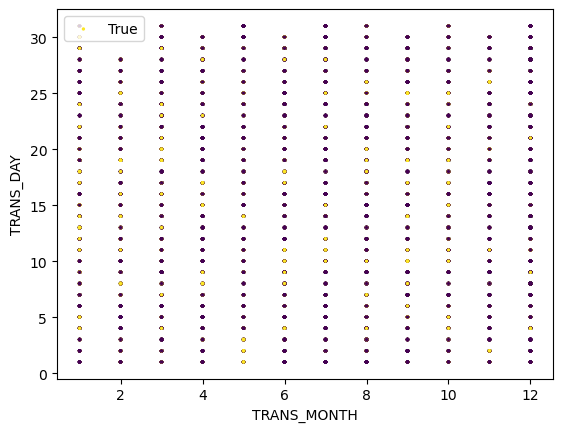

In [34]:
x_feature = "TRANS_MONTH"
y_feature = "TRANS_DAY"

plt.scatter(x = df_train_x[x_feature], y = df_train_x[y_feature], c = df_train_y["IS_FRAUD"], s = 2)
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.legend(df_train_y["IS_FRAUD"])
plt.show()

변수의 갯수가 적은 경우에는 시각화보다 표 또는 PLOT그래프로 정리하는게 더 좋음.

독립변수가 AMT, CITY_POP조합을 제외하면 전부 표나 PLOT그래프로 정리해 놓는게 유리하다

## 시각화 먼저 진행

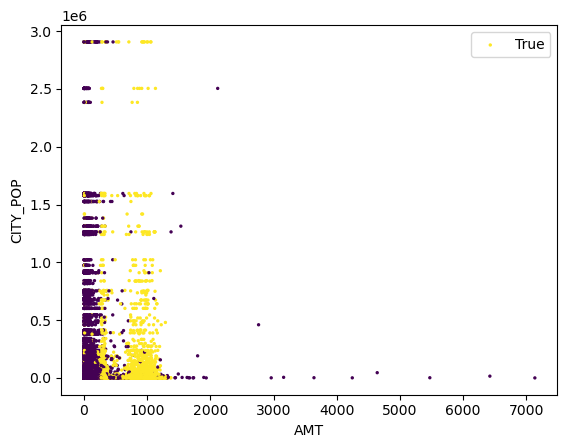

In [35]:
x_feature = "AMT"
y_feature = "CITY_POP"

plt.scatter(x = df_train_x[x_feature], y = df_train_x[y_feature], c = df_train_y["IS_FRAUD"], s = 2)
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.legend(df_train_y["IS_FRAUD"])
plt.show()

변수의 갯수가 많아서 시각화 하기에 적절

## 여기서 train feature테이블과 target테이블을 concat함

In [36]:
df_train = pd.concat([df_train_x, df_train_y],axis = 1)

In [37]:
# df_train = df_train[(df_train["CITY_POP"] < 1200000) & (df_train["AMT"] < 2000)]

# print(df_train.isnull().sum())

# print(df_train.shape)

# x_feature = "AMT"
# y_feature = "CITY_POP"

# plt.scatter(x = df_train[x_feature], y = df_train[y_feature], c = df_train["IS_FRAUD"], s = 2)
# plt.xlabel(x_feature)
# plt.ylabel(y_feature)
# plt.legend(df_train_y["IS_FRAUD"])
# plt.show()

In [38]:
# df_train.head(88)

FRAUD가 CITY_POP과는 전혀 연관이 없어 보인다. (CITY_POP이 무엇이든 간에 AMT에 대한 FRAUD의 분포는 거의 동일함)
# 결론1: CITY_POP은 모델에서 빼자

##### 이제 PLOT그래프를 그려볼 차례이다.
##### AMT는 값의 종류가 매우 많기 때문에 일정한 범위로 묶어서 PLOT그래프를 그려야 한다

# 주의!
## 한 column에서 가질 수 있는 각각의 값의 갯수가 서로 다르기 때문에, FRAUD가 아니라 FRAUD_RATIO를 사용해야 한다.

In [39]:
#The ratio of FRAUD about AMT

amt_group = pd.DataFrame(columns = ["FRAUD", "NOT_FRAUD", "FRAUD_RATIO"], index = ["0~250", "251~500", "501~750", "751~1000", "1001~1250", "1251~"])

amt_group = amt_group.fillna(0)

amt_group

,FRAUD,NOT_FRAUD,FRAUD_RATIO
0~250,0,0,0
251~500,0,0,0
501~750,0,0,0
751~1000,0,0,0
1001~1250,0,0,0
1251~,0,0,0


In [40]:
for i in range(df_train.shape[0]):
    try:
        if((df_train.loc[i, "AMT"] >= 0) and (df_train.loc[i, "AMT"] <= 250)):
            if(df_train.loc[i,"IS_FRAUD"] == True):
                amt_group.loc["0~250", "FRAUD"] = amt_group.loc["0~250", "FRAUD"] + 1
            else:
                amt_group.loc["0~250", "NOT_FRAUD"] = amt_group.loc["0~250", "NOT_FRAUD"] + 1
        if((df_train.loc[i, "AMT"] >= 251) and (df_train.loc[i, "AMT"] <= 500)):
            if(df_train.loc[i,"IS_FRAUD"] == True):
                amt_group.loc["251~500", "FRAUD"] = amt_group.loc["251~500", "FRAUD"] + 1
            else:
                amt_group.loc["251~500", "NOT_FRAUD"] = amt_group.loc["251~500", "NOT_FRAUD"] + 1
        if((df_train.loc[i, "AMT"] >= 501) and (df_train.loc[i, "AMT"] <= 750)):
            if(df_train.loc[i,"IS_FRAUD"] == True):
                amt_group.loc["501~750", "FRAUD"] = amt_group.loc["501~750", "FRAUD"] + 1
            else:
                amt_group.loc["501~750", "NOT_FRAUD"] = amt_group.loc["501~750", "NOT_FRAUD"] + 1
        if((df_train.loc[i, "AMT"] >= 751) and (df_train.loc[i, "AMT"] <= 1000)):
            if(df_train.loc[i,"IS_FRAUD"] == True):
                amt_group.loc["751~1000", "FRAUD"] = amt_group.loc["751~1000", "FRAUD"] + 1
            else:
                amt_group.loc["751~1000", "NOT_FRAUD"] = amt_group.loc["751~1000", "NOT_FRAUD"] + 1
        if((df_train.loc[i, "AMT"] >= 1001) and (df_train.loc[i, "AMT"] <= 1250)):
            if(df_train.loc[i,"IS_FRAUD"] == True):
                amt_group.loc["1001~1250", "FRAUD"] = amt_group.loc["1001~1250", "FRAUD"] + 1
            else:
                amt_group.loc["1001~1250", "NOT_FRAUD"] = amt_group.loc["1001~1250", "NOT_FRAUD"] + 1
        else:
            if(df_train.loc[i,"IS_FRAUD"] == True):
                amt_group.loc["1251~", "FRAUD"] = amt_group.loc["1251~", "FRAUD"] + 1
            else:
                amt_group.loc["1251~", "NOT_FRAUD"] = amt_group.loc["1251~", "NOT_FRAUD"] + 1
    except:
        pass
            
print(amt_group)

           FRAUD  NOT_FRAUD  FRAUD_RATIO
0~250       1462      21650            0
251~500     1499        361            0
501~750      407        126            0
751~1000    1669         28            0
1001~1250    715         19            0
1251~       5076      22204            0


In [41]:
amt_group["FRAUD_RATIO"] = amt_group["FRAUD"]/(amt_group["NOT_FRAUD"] + amt_group["FRAUD"])

amt_group

,FRAUD,NOT_FRAUD,FRAUD_RATIO
0~250,1462,21650,0.063257
251~500,1499,361,0.805914
501~750,407,126,0.763602
751~1000,1669,28,0.983500
1001~1250,715,19,0.974114
1251~,5076,22204,0.186070


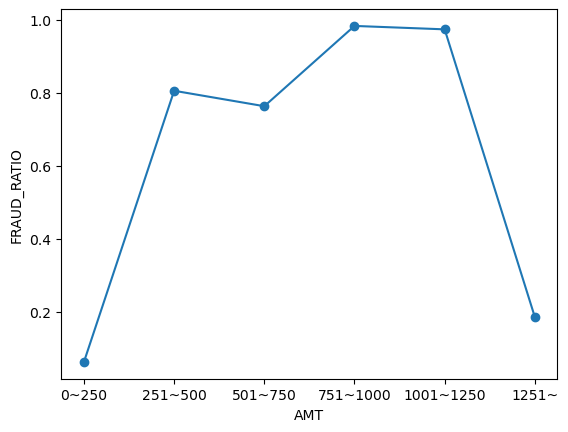

In [42]:
plt.plot(["0~250", "251~500", "501~750", "751~1000", "1001~1250", "1251~"], amt_group["FRAUD_RATIO"])
plt.scatter(["0~250", "251~500", "501~750", "751~1000", "1001~1250", "1251~"], amt_group["FRAUD_RATIO"])
plt.xlabel("AMT")
plt.ylabel("FRAUD_RATIO")
plt.show()

# 결론2: AMT는 M자 모양의 모델을 선정한다.

In [43]:
type(df_train["CITY_POP"].unique())

numpy.ndarray

### 나머지 features에 대하여 FRAUD_RATIO를 구하는 함수를 정의한다.
#### PARAMETER: 첫 번째 열은 FRAUD_RATIO를 구하고 싶은 feature가, 두 번재 열은 IS_FRAUD 열이다.

In [44]:
def find_fraud_ratio(df):
    obj_column_name = list(df.columns)
    obj_column_name = obj_column_name[0]
    
    print(obj_column_name)
    
    idx_list = list(df[obj_column_name].unique())
    
    df_result = pd.DataFrame(columns = ["INDEX", "FRAUD", "NOT_FRAUD", "FRAUD_RATIO"], index = idx_list)
    df_result = df_result.fillna(0)
    df_result["INDEX"] = idx_list
    

    for i in range(df.shape[0]):
        try:
            if(df.loc[i, "IS_FRAUD"] == True):
                df_result.loc[(df.loc[i, obj_column_name]), "FRAUD"] += 1
            else:
                df_result.loc[(df.loc[i, obj_column_name]), "NOT_FRAUD"] += 1
        except:
            pass
            
    df_result["FRAUD_RATIO"] = df_result["FRAUD"] / (df_result["FRAUD"] + df_result["NOT_FRAUD"])
    
    df_result = df_result[["INDEX", "FRAUD_RATIO"]]
    
    df_result = df_result.sort_values("INDEX")
    
    df_result = df_result.rename(columns={"INDEX":obj_column_name})
    
    return df_result

리턴값은 1열이 한 feature가 가지는 값의 종류이고, 2열이 FRAUD_RATIO이다.

In [45]:
print(df_train.columns)

Index(['TRANS_YEAR', 'IS_COVID_YEAR', 'TRANS_MONTH', 'TRANS_DAY',
       'TRANS_DAY_SIMPLIFIED', 'TRANS_HOUR', 'TRANS_HOUR_SIMPLIFIED',
       'CATEGORY', 'AMT', 'GENDER', 'CITY', 'CITY_POP', 'STATE', 'JOB', 'AGE',
       'CC_NUM', 'log_AMT', 'BC_CITY_POP', 'IS_FRAUD'],
      dtype='object')


TRANS_YEAR


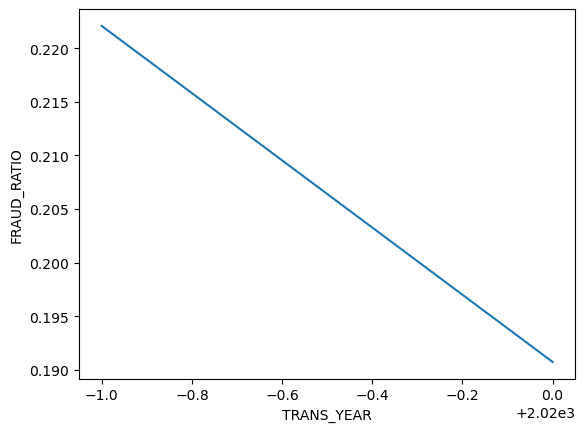

In [46]:
df_trans_year = find_fraud_ratio(df_train[["TRANS_YEAR", "IS_FRAUD"]])

plt.plot(df_trans_year["TRANS_YEAR"], df_trans_year["FRAUD_RATIO"])
plt.xlabel("TRANS_YEAR")
plt.ylabel("FRAUD_RATIO")
plt.show()

# 결론3: TRANS_YEAR은 종류가 2개 뿐이기 때문에 의미가 없다(제외!)

TRANS_MONTH
    TRANS_MONTH  FRAUD_RATIO
1             1     0.296580
2             2     0.291395
3             3     0.232135
4             4     0.196737
5             5     0.248343
6             6     0.200226
7             7     0.157340
8             8     0.187020
9             9     0.209184
10           10     0.249048
11           11     0.192456
12           12     0.128516


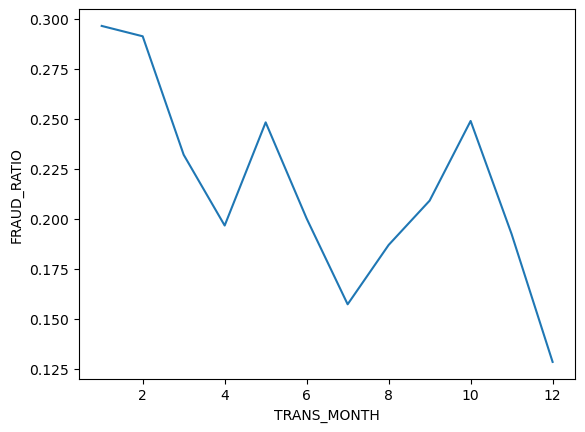

In [47]:
df_trans_month = find_fraud_ratio(df_train[["TRANS_MONTH", "IS_FRAUD"]])

print(df_trans_month)

plt.plot(df_trans_month["TRANS_MONTH"], df_trans_month["FRAUD_RATIO"])
plt.xlabel("TRANS_MONTH")
plt.ylabel("FRAUD_RATIO")
plt.show()

# 결론4: TRANS_MONTH는 4차함수 모양의 모델을 선정한다.

TRANS_DAY_SIMPLIFIED
   TRANS_DAY_SIMPLIFIED  FRAUD_RATIO
0                     0     0.200667
1                     1     0.226039
2                     2     0.194250


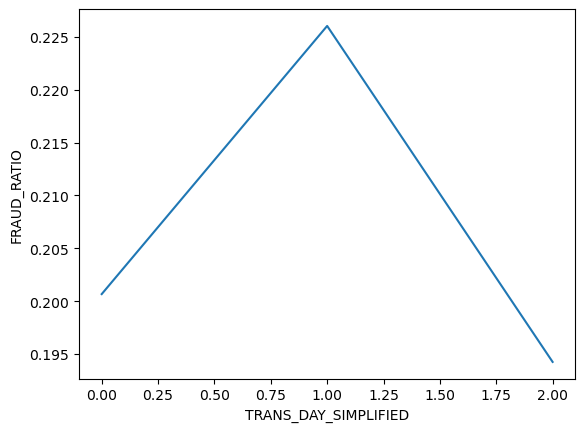

In [48]:
df_trans_day_simplified = find_fraud_ratio(df_train[["TRANS_DAY_SIMPLIFIED", "IS_FRAUD"]])

print(df_trans_day_simplified)

plt.plot(df_trans_day_simplified["TRANS_DAY_SIMPLIFIED"], df_trans_day_simplified["FRAUD_RATIO"])
plt.xlabel("TRANS_DAY_SIMPLIFIED")
plt.ylabel("FRAUD_RATIO")
plt.show()

TRANS_HOUR_SIMPLIFIED
   TRANS_HOUR_SIMPLIFIED  FRAUD_RATIO
0                      0     0.295506
1                      1     0.047840
2                      2     0.046963
3                      3     0.357904


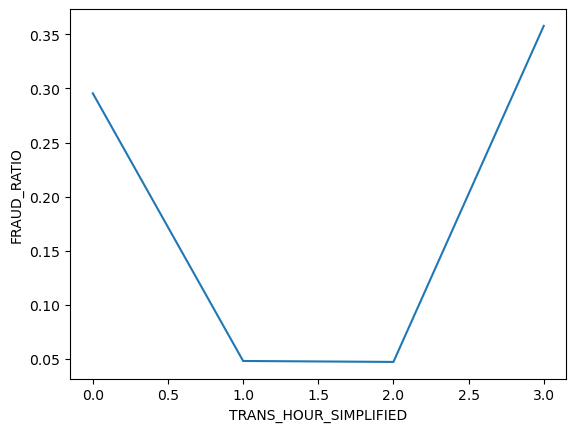

In [49]:
df_trans_hour_simplified = find_fraud_ratio(df_train[["TRANS_HOUR_SIMPLIFIED", "IS_FRAUD"]])

print(df_trans_hour_simplified)

plt.plot(df_trans_hour_simplified["TRANS_HOUR_SIMPLIFIED"], df_trans_hour_simplified["FRAUD_RATIO"])
plt.xlabel("TRANS_HOUR_SIMPLIFIED")
plt.ylabel("FRAUD_RATIO")
plt.show()

CATEGORY
    CATEGORY  FRAUD_RATIO
0          0     0.386607
1          1     0.385940
2          2     0.097325
3          3     0.172023
4          4     0.120505
5          5     0.127660
6          6     0.461591
7          7     0.246224
8          8     0.077751
9          9     0.093468
10        10     0.068238
11        11     0.103281
12        12     0.087470
13        13     0.064432


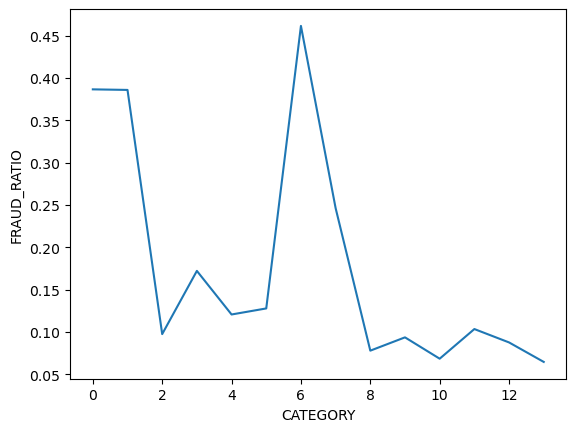

In [50]:
df_trans_category = find_fraud_ratio(df_train[["CATEGORY", "IS_FRAUD"]])

print(df_trans_category)

plt.plot(df_trans_category["CATEGORY"], df_trans_category["FRAUD_RATIO"])
plt.xlabel("CATEGORY")
plt.ylabel("FRAUD_RATIO")
plt.show()

STATE
    STATE  FRAUD_RATIO
0       0     0.175227
1       1     0.198992
2       2     0.157025
3       3     0.129167
4       4     0.251524
5       5     0.200120
6       6     0.210019
7       7     0.235602
8       8     0.211200
9       9     0.150943
10     10     0.220541
11     11     0.198060
12     12     0.222222
13     13     0.194274
14     14     0.198997
15     15     0.235915
16     16     0.202952
17     17     0.179074
18     18     0.215311
19     19     0.185972
20     20     0.188011
21     21     0.166667
22     22     0.245810
23     23     0.264706
24     24     0.137019
25     25     0.225000
26     26     0.212903
27     27     0.233707
28     28     0.206122
29     29     0.176991
30     30     0.203088
31     31     0.180060
32     32     0.203509
33     33     0.212947
34     34     0.236111
35     35     0.182927
36     36     0.225000
37     37     0.212891
38     38     0.239057
39     39     0.198312
40     40     0.186732
41     41     0.241706
42   

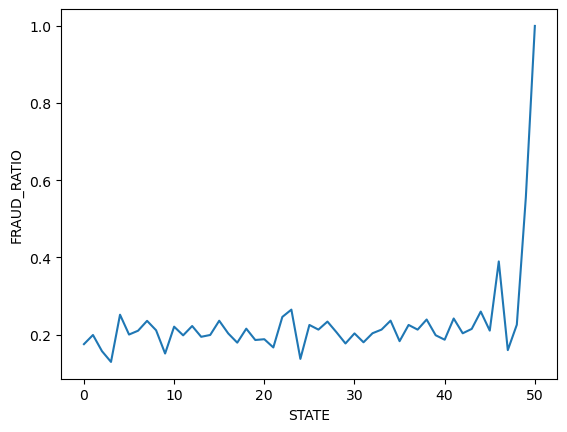

In [51]:
df_trans_state = find_fraud_ratio(df_train[["STATE", "IS_FRAUD"]])

print(df_trans_state)

plt.plot(df_trans_state["STATE"], df_trans_state["FRAUD_RATIO"])
plt.xlabel("STATE")
plt.ylabel("FRAUD_RATIO")
plt.show()

## 일단 TRANS_DAY를 넣어서 정렬테스트를 진행

In [52]:
df_train = pd.concat([df_train_x, df_train_y], axis = 1)
df_train.head()

df_train = df_train.sort_values(by=["CC_NUM", "TRANS_DAY"] ,ascending=True)

df_train.head(20)

,TRANS_YEAR,IS_COVID_YEAR,TRANS_MONTH,TRANS_DAY,TRANS_DAY_SIMPLIFIED,TRANS_HOUR,TRANS_HOUR_SIMPLIFIED,CATEGORY,AMT,GENDER,CITY,CITY_POP,STATE,JOB,AGE,CC_NUM,log_AMT,BC_CITY_POP,IS_FRAUD
8359,2019,False,3,1,0,2,0,3,11.74,False,Fort Washakie,1645,20,Information systems manager,37,60416207185,2.463002,5.070778,True
23590,2019,False,3,1,0,1,0,3,13.17,False,Fort Washakie,1645,20,Information systems manager,37,60416207185,2.577942,5.070778,True
1587,2019,False,3,2,0,23,3,8,130.08,False,Fort Washakie,1645,20,Information systems manager,37,60416207185,4.868150,5.070778,True
5953,2019,False,3,2,0,23,3,9,20.41,False,Fort Washakie,1645,20,Information systems manager,37,60416207185,3.016025,5.070778,True
11629,2019,False,3,2,0,23,3,12,19.23,False,Fort Washakie,1645,20,Information systems manager,37,60416207185,2.956472,5.070778,True
17863,2019,False,3,2,0,23,3,2,594.09,False,Fort Washakie,1645,20,Information systems manager,37,60416207185,6.387031,5.070778,True
17722,2020,True,12,3,0,16,2,13,38.42,False,Fort Washakie,1645,20,Information systems manager,37,60416207185,3.648578,5.070778,False
13522,2019,False,11,7,0,13,2,7,2.08,False,Fort Washakie,1645,20,Information systems manager,37,60416207185,0.732368,5.070778,False
16915,2019,False,3,7,0,18,2,12,16.54,False,Fort Washakie,1645,20,Information systems manager,37,60416207185,2.805782,5.070778,False
19065,2019,False,9,10,0,16,2,6,9.14,False,Fort Washakie,1645,20,Information systems manager,37,60416207185,2.212660,5.070778,False


### 날짜를 2019년 1월 1일을 0DAY라고 간주하고 며칠이 지났는지 표시하는 DAY컬럼을 추가한다.

In [53]:
list1 = []
for i in range(df_train.shape[0]):
    list1.append(0)

df_train["DAY"] = list1

df_train.head()

,TRANS_YEAR,IS_COVID_YEAR,TRANS_MONTH,TRANS_DAY,TRANS_DAY_SIMPLIFIED,TRANS_HOUR,TRANS_HOUR_SIMPLIFIED,CATEGORY,AMT,GENDER,CITY,CITY_POP,STATE,JOB,AGE,CC_NUM,log_AMT,BC_CITY_POP,IS_FRAUD,DAY
8359,2019,False,3,1,0,2,0,3,11.74,False,Fort Washakie,1645,20,Information systems manager,37,60416207185,2.463002,5.070778,True,0
23590,2019,False,3,1,0,1,0,3,13.17,False,Fort Washakie,1645,20,Information systems manager,37,60416207185,2.577942,5.070778,True,0
1587,2019,False,3,2,0,23,3,8,130.08,False,Fort Washakie,1645,20,Information systems manager,37,60416207185,4.868150,5.070778,True,0
5953,2019,False,3,2,0,23,3,9,20.41,False,Fort Washakie,1645,20,Information systems manager,37,60416207185,3.016025,5.070778,True,0
11629,2019,False,3,2,0,23,3,12,19.23,False,Fort Washakie,1645,20,Information systems manager,37,60416207185,2.956472,5.070778,True,0


In [54]:
df_train = df_train.reindex(list(range(df_train.shape[0])))

df_train.head()

,TRANS_YEAR,IS_COVID_YEAR,TRANS_MONTH,TRANS_DAY,TRANS_DAY_SIMPLIFIED,TRANS_HOUR,TRANS_HOUR_SIMPLIFIED,CATEGORY,AMT,GENDER,CITY,CITY_POP,STATE,JOB,AGE,CC_NUM,log_AMT,BC_CITY_POP,IS_FRAUD,DAY
0,2019,False,1,10,0,23,3,1,344.01,False,Fulton,355,45,Financial adviser,68,3513618443244549,5.840671,4.329507,True,0
1,2019,False,12,30,2,7,1,1,92.80,False,Avoca,2036,8,Engineering geologist,52,4198470814557,4.530447,5.164343,False,0
2,2020,True,9,28,2,14,2,9,6.02,False,Mulberry Grove,1810,43,Race relations officer,48,371226440126102,1.795087,5.112989,False,0
3,2019,False,9,1,0,23,3,6,1002.17,True,Sacramento,757530,11,Magazine features editor,44,4890424426862856940,6.909923,7.052526,True,0
4,2019,False,6,5,0,22,3,8,107.33,False,Lawn,213,5,Special educational needs teacher,51,4169759661243568,4.675908,4.053561,True,0


In [55]:
import datetime as dt

for i in range(df_train.shape[0]):
    dt1 = dt.datetime(2019, 1, 1)
    dt2 = dt.datetime(df_train.loc[i, "TRANS_YEAR"], df_train.loc[i, "TRANS_MONTH"], df_train.loc[i, "TRANS_DAY"])
    if(dt1 == dt2):
        td = 0
        df_train.loc[i, "DAY"] = td
    else:
        td = dt2 - dt1
        df_train.loc[i, "DAY"] = td
        list_temp = (str(df_train.loc[i, "DAY"]).split(" day"))
#         print(list_temp)
#         print(type(list_temp[0]))
        df_train.loc[i, "DAY"] = list_temp[0]

df_train["DAY"] = df_train["DAY"].astype(int)

df_train.head()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28014 entries, 0 to 28013
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TRANS_YEAR             28014 non-null  int64  
 1   IS_COVID_YEAR          28014 non-null  bool   
 2   TRANS_MONTH            28014 non-null  int64  
 3   TRANS_DAY              28014 non-null  int64  
 4   TRANS_DAY_SIMPLIFIED   28014 non-null  int64  
 5   TRANS_HOUR             28014 non-null  int64  
 6   TRANS_HOUR_SIMPLIFIED  28014 non-null  int64  
 7   CATEGORY               28014 non-null  int64  
 8   AMT                    28014 non-null  float64
 9   GENDER                 28014 non-null  bool   
 10  CITY                   28014 non-null  object 
 11  CITY_POP               28014 non-null  int64  
 12  STATE                  28014 non-null  int64  
 13  JOB                    28014 non-null  object 
 14  AGE                    28014 non-null  int64  
 15  CC

In [56]:
df_train.head()

df_train = df_train.sort_values(by=["CC_NUM", "DAY"] ,ascending=True)

df_train.head(50)

df_train.to_csv("data/ordered_by_ccnum_and_day.csv")

### CC_NUM을 기준으로 동일한 CC_NUM에 대하여 날짜가 오름차순으로 정렬되었다!